In [2]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

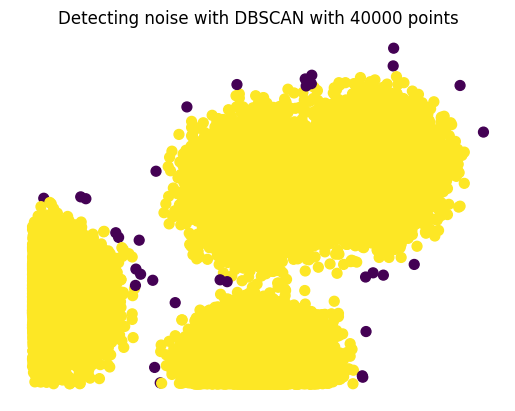

In [3]:

# TODO: Debes de correr 20000, 40000, 80000, 120000, 140000, 160000, 180000, 200000 puntos 

# Indicate the number of points
n_points = 40000

# randomly generating data points and noise
points, y_true = make_blobs(n_samples=n_points,
                            centers=4,
                            cluster_std=0.06,
                            random_state=11,
                            center_box=(0, 1.0))

# only positive points and with three decimals
points = np.round(np.abs(points[:, ::-1]), 3)

# storing points into a csv file
np.savetxt(str(n_points)+"_data.csv", points, delimiter=",",  fmt="%.3f")

# clustering and detecting noise with dbscan
clusters = DBSCAN(eps=0.03, min_samples=10).fit_predict(points)

# plotting noise
plt.figure()
plt.title(f"Detecting noise with DBSCAN with {n_points} points")
plt.scatter(points[:, 0], points[:, 1], c=np.where(clusters==-1, 0, 1), s=50)
plt.xticks([])
plt.yticks([])
plt.box(False)
plt.show()


## Implementacion serial

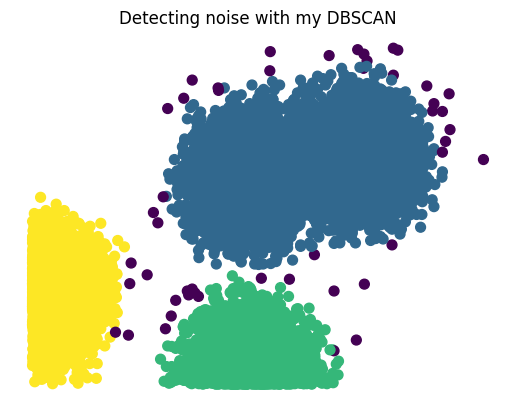

In [8]:

# loading results from c++ program into a numpy array
result = np.loadtxt(str(n_points)+"_results_serial.csv", delimiter=",")

# plotting noise
plt.figure()
plt.title("Detecting noise with my DBSCAN")
plt.scatter(result.T[0], result.T[1], c=result.T[2], s=50)
plt.xticks([])
plt.yticks([])
plt.box(False)
plt.show()

## Implementacion paralela 

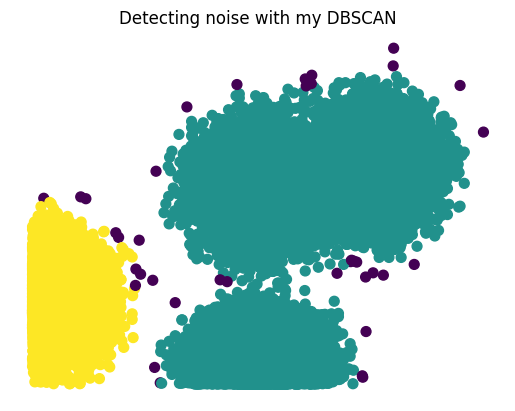

In [4]:

# loading results from c++ program into a numpy array
result = np.loadtxt(str(n_points)+"_results_paralelo.csv", delimiter=",")

# plotting noise
plt.figure()
plt.title("Detecting noise with my DBSCAN")
plt.scatter(result.T[0], result.T[1], c=result.T[2], s=50)
plt.xticks([])
plt.yticks([])
plt.box(False)
plt.show()